In [1]:
#  Ebnable HTML/CSS 
from IPython.core.display import HTML
HTML("<link href='https://fonts.googleapis.com/css?family=Passion+One' rel='stylesheet' type='text/css'><style>div.attn { font-family: 'Helvetica Neue'; font-size: 30px; line-height: 40px; color: #FFFFFF; text-align: center; margin: 30px 0; border-width: 10px 0; border-style: solid; border-color: #5AAAAA; padding: 30px 0; background-color: #DDDDFF; }hr { border: 0; background-color: #ffffff; border-top: 1px solid black; }hr.major { border-top: 10px solid #5AAA5A; }hr.minor { border: none; background-color: #ffffff; border-top: 5px dotted #CC3333; }div.bubble { width: 65%; padding: 20px; background: #DDDDDD; border-radius: 15px; margin: 0 auto; font-style: italic; color: #f00; }em { color: #AAA; }div.c1{visibility:hidden;margin:0;height:0;}div.note{color:red;}</style>")

___
Enter Team Member Names here (*double click to edit*):

- Sahil Johari
- Prabhat Pal
- Pritheesh Panchmahalkar
- Azeem Merchant

___

# In Class Assignment Four
In the following assignment you will be asked to fill in python code and derivations for a number of different problems. Please read all instructions carefully and turn in the rendered notebook (or HTML of the rendered notebook)  before the end of class (or right after class). The initial portion of this notebook is given before class and the remainder is given during class. Please answer the initial questions before class, to the best of your ability. Once class has started you may rework your answers as a team for the initial part of the assignment. 

<a id="top"></a>
## Contents
* <a href="#LoadingKDD">Loading KDDCup Data</a>
* <a href="#kdd_eval">KDDCup Evaluation and Cross Validation</a>
* <a href="#data_snooping">More Cross Validation</a>
* <a href="#stats">Statistical Comparison</a>

**Before coming to class**, please make sure you have the latest version of `scikit-learn`. This notebook was created for version 0.18 and higher. 

________________________________________________________________________________________________________

<a id="LoadingKDD"></a>
<a href="#top">Back to Top</a>
## Loading KDDCup Data

Please run the following code to read in the "KDD Cup" dataset from sklearn's data loading module. It consists of examples of different simulated attacks for the 1998 DARPA Intrusion Detection System (IDS). 

This will load the data into the variable `ds`. `ds` is a `bunch` object with fields like `ds.data` and `ds.target`. The field `ds.data` is a numpy matrix of the continuous features in the dataset. **The object is not a pandas dataframe. It is a numpy matrix.** Each row is a set of observed instances, each column is a different feature. It also has a field called `ds.target` that is an integer value we are trying to predict (i.e., a specific integer represents a specific person). Each entry in `ds.target` is a label for each row of the `ds.data` matrix. 

In [100]:
# fetch the dataset
from sklearn.datasets import  fetch_kddcup99
from sklearn import __version__ as sklearn_version

print('Sklearn Version:',sklearn_version)
ds =  fetch_kddcup99(subset='http')

Sklearn Version: 0.19.1


In [2]:
import numpy as np
# get some of the specifics of the dataset
X = ds.data
y = ds.target != b'normal.'

n_samples, n_features = X.shape
n_classes = len(np.unique(y))

print("n_samples: {}".format(n_samples))
print("n_features: {}".format(n_features))
print("n_classes: {}".format(n_classes))

n_samples: 58725
n_features: 3
n_classes: 2


___
**Question 1:** How many instances are in the binary classification problem loaded above? How many instances are in each class? **Plot a pie chart or bar chart of the number of classes.**

Number of instances: 58725
Number of instances in each class: [56516  2209]


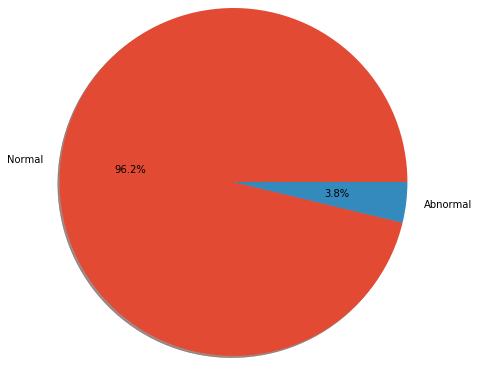

In [18]:
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline
plt.style.use('ggplot')


#=== Fill in code below========
print('Number of instances:', n_samples)
print('Number of instances in each class:', np.bincount(y))
the_grid = GridSpec(1, 1)

plt.subplot(the_grid[0, 0], aspect=1)
plt.pie(np.bincount(y), labels=['Normal', 'Abnormal'], autopct='%1.1f%%', shadow=True, radius=2)
plt.show()

<a id="kdd_eval"></a>
<a href="#top">Back to Top</a>
## KDDCup Evaluation and Cross Validation

CV accuracy: 0.999710 +/- 0.000438


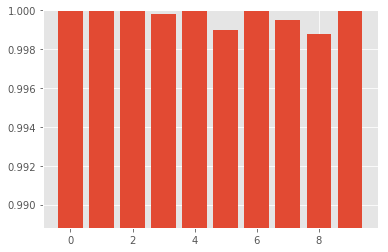

In [115]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression

# select model
clf = LogisticRegression()
#select cross validation
cv = KFold(n_splits=10)
# select evaluation criteria
my_scorer = make_scorer(accuracy_score)
# run model training and cross validation
per_fold_eval_criteria = cross_val_score(estimator=clf,
                                    X=X,
                                    y=y,
                                    cv=cv,
                                    scoring=my_scorer
                                   )
plt.bar(range(len(per_fold_eval_criteria)),per_fold_eval_criteria)
plt.ylim([min(per_fold_eval_criteria)-0.01,max(per_fold_eval_criteria)])

print('CV accuracy: %f +/- %f' % (np.mean(per_fold_eval_criteria), np.std(per_fold_eval_criteria)))

____
**Question 2** Is the code above a proper separation of training and testing sets for the given dataset? Why or why not?

No, the code above is not a proper separation of training and testing sets for a given dataset. As we can see from the pie chart for the number of classes, 96.2 % of the data belongs to class A (Normal) and 3.8 % to class B (Abnormal). Using K-fold cross validation on this can cause class imbalance causing bias toward class with more number of instances, which might not deliver a good classifier performance.
___

**Question 3:** Is the evaluation metric chosen in the above code appropriate for the dataset? Why or Why not?

Again, no. As discussed about the class distribution in the previous answer, this is an imbalanced 2-class problem. That means the accuracy score can be misleading because it is ignoring the cost of misclassification.
___

**Exercise 1:** If the code above is not a proper separation of the train or does not use the proper evaluation criteria, fix the code in the block below to use appropriate train/test separation and appropriate evaluation criterion (criteria). 

CV accuracy: 0.999766 +/- 0.000201


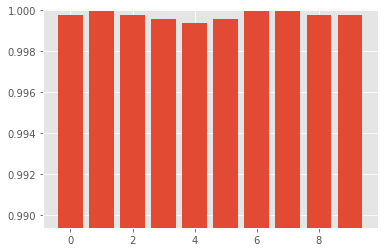

In [114]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
# these imports above might help you

#=====Write your code below here=================
# select model
clf = LogisticRegression()

#split the data (80-20) using Shuffle split
s_split = ShuffleSplit(n_splits=1, test_size=0.2)
for train_index, test_index in s_split.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
#select cross validation    
cv = StratifiedKFold(n_splits=10, shuffle=False, random_state=None).split(X_train, y_train)
# select evaluation criteria
my_scorer = make_scorer(accuracy_score)
# run model training and cross validation
per_fold_eval_criteria = cross_val_score(estimator=clf,
                                    X=X_train,
                                    y=y_train,
                                    cv=cv,
                                    scoring=my_scorer
                                   )
plt.bar(range(len(per_fold_eval_criteria)),per_fold_eval_criteria)
plt.ylim([min(per_fold_eval_criteria)-0.01,max(per_fold_eval_criteria)])

print('CV accuracy: %f +/- %f' % (np.mean(per_fold_eval_criteria), np.std(per_fold_eval_criteria)))

____
**Question 4**: Does the learning algorithm perform well based on the evaluation criteria? Why or why not?


*Enter you answer here (double click)*

Yes, the performance of the learning algorithm appears to have slightly improved. We think the reason to be the use of Stratified K-fold cross validation, for which we argued in the previous question.
 


___


<a id="data_snooping"></a>
<a href="#top">Back to Top</a>

## More Cross Validation

**Exercise 2:** Does the code below contain any errors in the implementation of the cross validation? If so, fix the code below.  

Fold: 1, Acc: 0.999149
Fold: 2, Acc: 0.999574
Fold: 3, Acc: 0.999362
Fold: 4, Acc: 0.999574
Fold: 5, Acc: 0.998936
Fold: 6, Acc: 0.998936
Fold: 7, Acc: 0.999574
Fold: 8, Acc: 0.998935
Fold: 9, Acc: 0.999787
Fold: 10, Acc: 0.999787

CV accuracy: 0.999361 +/- 0.000330


(0.98893549073876941, 0.99978709814775391)

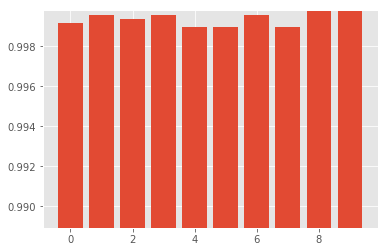

In [117]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import warnings
warnings.simplefilter("ignore")

#======If there are errors, fix them below======
n_components = 1
pca = PCA(n_components=n_components)
Xpca = pca.fit_transform(X)

#split the PCA data (80-20) using Shuffle split
s_split = ShuffleSplit(n_splits=1, test_size=0.2)
for train_index, test_index in s_split.split(Xpca):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

clf = Pipeline([('scl',StandardScaler()),
                 ('pca', pca),
                ('clf',LogisticRegression())])

#select cross validation    
cv = StratifiedKFold(n_splits=10, shuffle=False, random_state=None).split(X_train, y_train)

# =====fixed code======
# write the fixed code (if needed) below
# code taken from "Evaluation note book"
scores = []
for k, (train, test) in enumerate(cv):
    clf.fit(X_train[train], y_train[train])
    score = clf.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %s, Acc: %f' % (k+1, score))
    
print('\nCV accuracy: %f +/- %f' % (np.mean(scores), np.std(scores)))
plt.bar(range(len(scores)),scores)
plt.ylim([min(scores)-0.01,max(scores)])

___
For this question, the circumstances for the DARPA KDD99 cup are changed in the following way:
- When the model for detecting attacks is deployed, we now think that it will often need to be retrained.
- DARPA anticipates that there will be a handful of different style attacks on their systems that have never been seen before. To detect these new attacks, they are employing programmers and analysts to find them manually every day. 
- DARPA believes the perpetrators of these new attacks are more sophisticated, so finding the new attacks will take priority over detecting the older, known attacks. 
- DARPA wants to use your learning algorithm for detecting only these new attacks, but the amount of training and testing data will be extremely small, because the analysts can only identify a handful of new style attacks each day.
- DARPA asks you if you think its a good idea to employ retraining your model each day to find these new attacks.

**Question 5**: How would you change the method of cross validation to answer this question from DARPA? That is, how can you change your cross validation method to better mirror how your system will be used and deployed by DARPA? 

*Enter you answer here (double click)*


We could make use of learning curves or validation curves to avoid overfitting and underfitting and train the model accordingly. We also need to construct a cost matrix which has high costs for the newly trained attacks as they have more priority over the older attacks. We could also tune the hyper parameters as the model is retrained with new data.
___

In [97]:
#plotting function for use in next question
# takes input 'test_scores', and an x-axis label
def plot_filled(test_scores,train_x_axis, xlabel=''):
    
    test_mean = np.percentile(test_scores,50, axis=1)
    test_max = np.percentile(test_scores,95, axis=1) 
    test_min = np.percentile(test_scores,5, axis=1) 

    plt.plot(train_x_axis, test_mean,
             color='blue', linestyle='--',
             marker='s', markersize=5,
             label='validation set')

    plt.fill_between(train_x_axis,
                     test_min,
                     test_max,
                     alpha=0.15, color='blue')

    plt.grid(True)
    plt.xlabel(xlabel)
    plt.ylabel('Evaluation Criterion')
    plt.legend(loc='lower right')
    plt.tight_layout()

___
DARPA is also concerned about how much training data they will need from the analysts in order to have a high performing model. They would like to use the current dataset to help answer that question. The code below is written for you to help answer DARPA's question about how many examples will be needed for training. Examine the code and then answer the following question:

**Question 6**: Based on the analysis graphed below, how many positive examples are required to have a good tradeoff between bias and variance for the given evaluation criteria? Why?

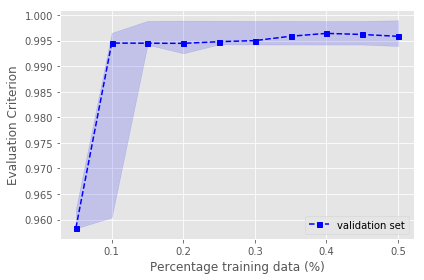

In [102]:
clf = LogisticRegression()

test_scores = []
train_sizes=np.linspace(5e-4,5e-3,10)

for size in train_sizes:
    cv = StratifiedShuffleSplit(n_splits=100,
                                train_size = size,
                                test_size = 1-size,
                               )
    test_scores.append(cross_val_score(estimator=clf,X=X,y=y,cv=cv,scoring=my_scorer))

plot_filled(np.array(test_scores), train_sizes*100, 'Percentage training data (%)')

___
*Enter you answer here (double click)*

It seems that there is an improved trend in the trade-off between the variance and bias from 0.1% onwards. However, at 0.25% and 0.3%, we can see the sweet spots having almost equal variance and bias values. To find the number of positive examples, we can multiply the number of instances of class 'Abnormal' by percentage training data at the sweet spots which is (2209 x 0.0025) & (2209 x 0.003). Hence, we can have 5-6 positives examples.
___

___
<a id="stats"></a>
<a href="#top">Back to Top</a>

# Statistical Comparison
Now lets create a few different models and see if any of them have statistically better performances. 

We are creating three different classifiers below to compare to one another. For creating different training and testing splits, we are using stratified shuffle splits on the datasets. 



In [104]:
clf1 = LogisticRegression(C=100)
clf2 = LogisticRegression(C=1)
clf3 = LogisticRegression(C=0.1)

train_size = 0.003 # small training size
cv = StratifiedShuffleSplit(n_splits=10,train_size=train_size,test_size=1-train_size)

evals1 = cross_val_score(estimator=clf1,X=X,y=y,scoring=my_scorer,cv=cv)
evals2 = cross_val_score(estimator=clf2,X=X,y=y,scoring=my_scorer,cv=cv)
evals3 = cross_val_score(estimator=clf3,X=X,y=y,scoring=my_scorer,cv=cv)

**Question 7**: Given the code above, what statistical test is more appropriate for selecting confidence intervals, and **why**? Your options are:
- **A**: approximating the evaluation criterion as a binomial distribution and bounding by the variance (the first option we used in the flipped lecture video)
- **B**: approximating the bounds using the folds of the cross validation to get mean and variance (the second option we used in the flipped lecture video)
- **C**: Either are acceptable statistical tests for obtaining confidence intervals

*Enter you answer here (double click)*

The reason that I think B is correct is because the training size is small, which will not cause the variances to add up. In case of approximating the bounds using folds, the individual variances will give us a better ground for selecting the confidence intervals.
___

___
**Final Exercise:** With 95% confidence, perform the statistical test that you selected above. Is any model or set of models statistically the best performer(s)? Or can we not say if the models are different with greater than 95% confidence?

If you chose option A, use a multiplier of Z=1.96. The number of instances used in testing can be calculated from the variable `train_size`.

If you chose option B, use a multiplier of t=2.26 and k=10.

In [134]:
#===================================================
# Enter your code below

t = 2.26/np.sqrt(10)

print("Error rate of Model A: ", np.mean((1 - evals1)))
print("Error rate of Model B: ", np.mean((1 - evals2)))
print("Error rate of Model C: ", np.mean((1 - evals3)))
print("---------")
e = (1 - evals1) - (1 - evals2)
stdtot = np.std(e)
dbar = np.mean(e)
print("Range of: ",np.abs(dbar)-t*np.abs(stdtot), np.abs(dbar)+t*np.abs(stdtot)) 

e = (1 - evals3) - (1 - evals2)
stdtot = np.std(e)
dbar = np.mean(e)
print("Range of: ",np.abs(dbar)-t*np.abs(stdtot), np.abs(dbar)+t*np.abs(stdtot)) 

e = (1 - evals3) - (1 - evals1)
stdtot = np.std(e)
dbar = np.mean(e)
print("Range of: ",np.abs(dbar)-t*np.abs(stdtot), np.abs(dbar)+t*np.abs(stdtot)) 


print('\nModel A & B have statistically the best performers with 95% confidence')
#===================================================

Error rate of Model A:  0.00445780457395
Error rate of Model B:  0.00481818647628
Error rate of Model C:  0.0408785803344
---------
Range of:  -0.00169172657585 0.00241249038052
Range of:  0.0353512838401 0.0367695038762
Range of:  0.0343255080179 0.0385160435031

Model A & B have statistically the best performers with 95% confidence


Since the confidence interval of Model A & B includes zero, we cannot say which one of them is better. We can roughly say that these two models have better performances than Model C as both of them have lower error rates than C.  

________________________________________________________________________________________________________

That's all! Please **save (make sure you saved!!!) and upload your rendered notebook** and please include **team member names** in the notebook submission.